## 5. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
combined_18_19 = pd.read_csv('combined_18_19.csv')

In [3]:
pd.isnull(combined_18_19.count_5_star)
combined_18_19['count_5_star'] = combined_18_19['count_5_star'].replace(np.nan, 0)
combined_18_19['count_4_star'] = combined_18_19['count_4_star'].replace(np.nan, 0)
combined_18_19['work_life_balance'] = combined_18_19['work_life_balance'].replace(np.nan, 2.5)
combined_18_19['pay_and_benefits'] = combined_18_19['pay_and_benefits'].replace(np.nan, 2.5)
combined_18_19['job_security_and_advancement'] = combined_18_19['job_security_and_advancement'].replace(np.nan, 2.5)
combined_18_19['management'] = combined_18_19['management'].replace(np.nan, 2.5)
combined_18_19['culture'] = combined_18_19['culture'].replace(np.nan, 2.5)

In [4]:
combined_18_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6373 entries, 0 to 6372
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6373 non-null   object 
 1   EmployerName_x                6373 non-null   object 
 2   SicCodes                      6373 non-null   object 
 3   DiffMeanHourlyPercent         6373 non-null   float64
 4   DiffMedianHourlyPercent       6373 non-null   float64
 5   DiffMeanBonusPercent          6373 non-null   float64
 6   DiffMedianBonusPercent        6373 non-null   float64
 7   MaleBonusPercent              6373 non-null   float64
 8   FemaleBonusPercent            6373 non-null   float64
 9   MaleLowerQuartile             6373 non-null   float64
 10  FemaleLowerQuartile           6373 non-null   float64
 11  MaleLowerMiddleQuartile       6373 non-null   float64
 12  FemaleLowerMiddleQuartile     6373 non-null   float64
 13  Mal

In [5]:
combined_18_19.columns

Index(['Unnamed: 0', 'EmployerName_x', 'SicCodes', 'DiffMeanHourlyPercent',
       'DiffMedianHourlyPercent', 'DiffMeanBonusPercent',
       'DiffMedianBonusPercent', 'MaleBonusPercent', 'FemaleBonusPercent',
       'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile',
       'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile',
       'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile',
       'EmployerSize', 'SubmittedAfterTheDeadline', 'company_status',
       'jurisdiction', 'registered_address_country', 'company_type',
       'locality', 'female_final', 'male_final', 'percent_female_officer',
       'no_CompanyLink', 'no_ResponsiblePerson', 'review_header',
       'review_text', 'review_pros', 'review_cons', 'count_5_star',
       'count_4_star', 'count_3_star', 'count_2_star', 'count_1_star',
       'number_of_reviews', 'company_rating', 'work_life_balance',
       'pay_and_benefits', 'job_security_and_advancement', 'management',
       'culture

In [6]:
# we distinguish continuous and categorical variables
GPG_stats = ['DiffMeanHourlyPercent',
       'DiffMedianHourlyPercent', 'MaleBonusPercent', 'FemaleBonusPercent',
       'MaleLowerQuartile', 'FemaleLowerQuartile', 'MaleLowerMiddleQuartile',
       'FemaleLowerMiddleQuartile', 'MaleUpperMiddleQuartile',
       'FemaleUpperMiddleQuartile', 'MaleTopQuartile', 'FemaleTopQuartile']
continuous_var_1 = ['percent_female_officer']
continuous_var_2 = ['company_rating', 'work_life_balance',
       'pay_and_benefits', 'job_security_and_advancement', 'management',
       'culture']
continuous_var_3 = ['DiffMeanBonusPercent',
       'DiffMedianBonusPercent']
continuous_var_4 = ['count_5_star',
       'count_4_star', 'count_3_star', 'count_2_star', 'count_1_star']
# some of the categorical variables may have an order
categorical_var = ['SicCodes', 'EmployerSize', 'company_status', 'jurisdiction', 'registered_address_country', 
       'company_type','locality',]
# some of the categorical variables are binary
binary_var = ['SubmittedAfterTheDeadline', 'no_CompanyLink', 
        'no_ResponsiblePerson',]
y = ['DiffMeanHourlyPercent']

### Step 1: Have a look at the gender pay gap statistics in more detail - check the distribution of all the variables and look for outliers, check if the numbers are all as expected. I also needed to decide which variable I wanted to use as the target variable. I decided on mean pay gap as this is the most salient and easily interpretable variable, as well as the fact that it is normally distributed and has few outliers. 

In [7]:
combined_18_19[GPG_stats].describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,15.254715,12.078801,47.932842,45.998211,52.304048,47.695952,57.184199,42.815801,61.768492,38.231508,67.332402,32.667598
std,14.909529,15.376760,35.745728,35.766315,23.287955,23.287955,25.454204,25.454204,25.258318,25.258318,22.902180,22.902180
min,-98.700000,-92.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.200000,1.100000,10.900000,9.000000,35.000000,29.900000,38.000000,21.700000,43.500000,16.400000,52.800000,13.900000
50%,14.500000,9.900000,47.200000,43.700000,52.300000,47.700000,59.100000,40.900000,65.000000,35.000000,72.200000,27.800000
75%,24.000000,21.700000,84.000000,82.500000,70.100000,65.000000,78.300000,62.000000,83.600000,56.500000,86.100000,47.200000
max,91.500000,79.300000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


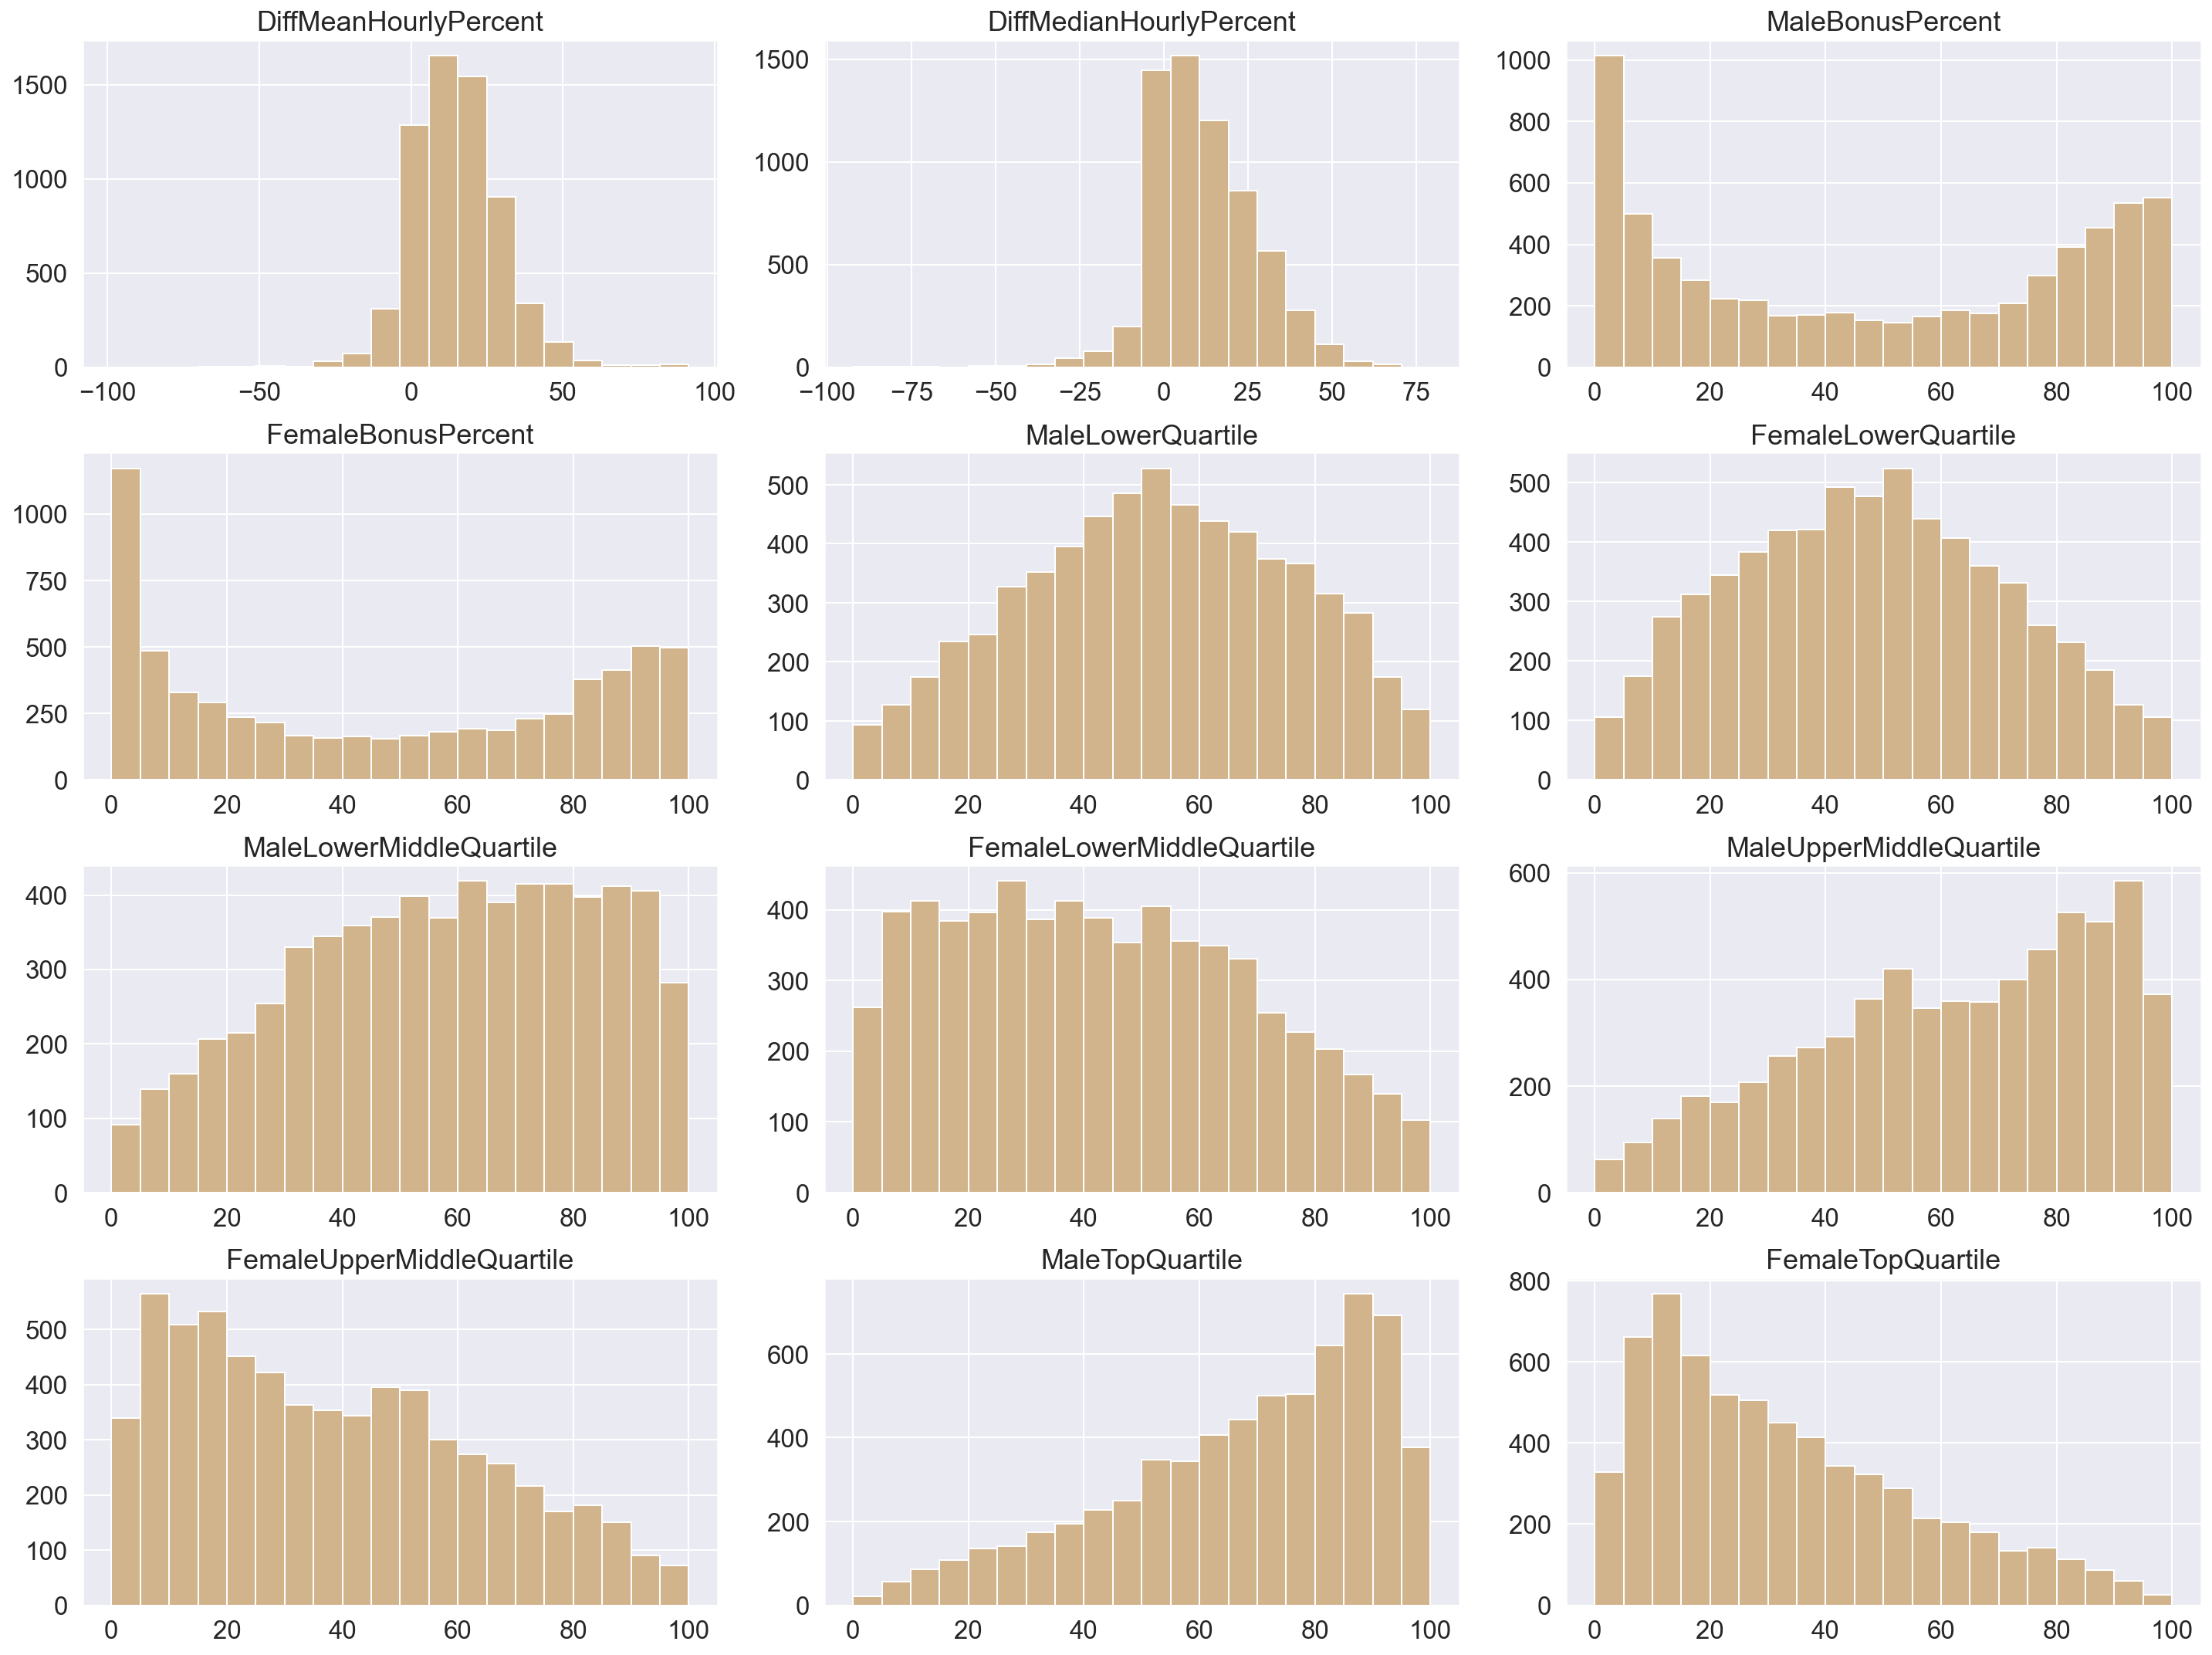

In [48]:
GPG_df = combined_18_19[GPG_stats]
GPG_df.hist(figsize=(20, 15), bins=20, color="tan")
plt.tight_layout()
plt.show()

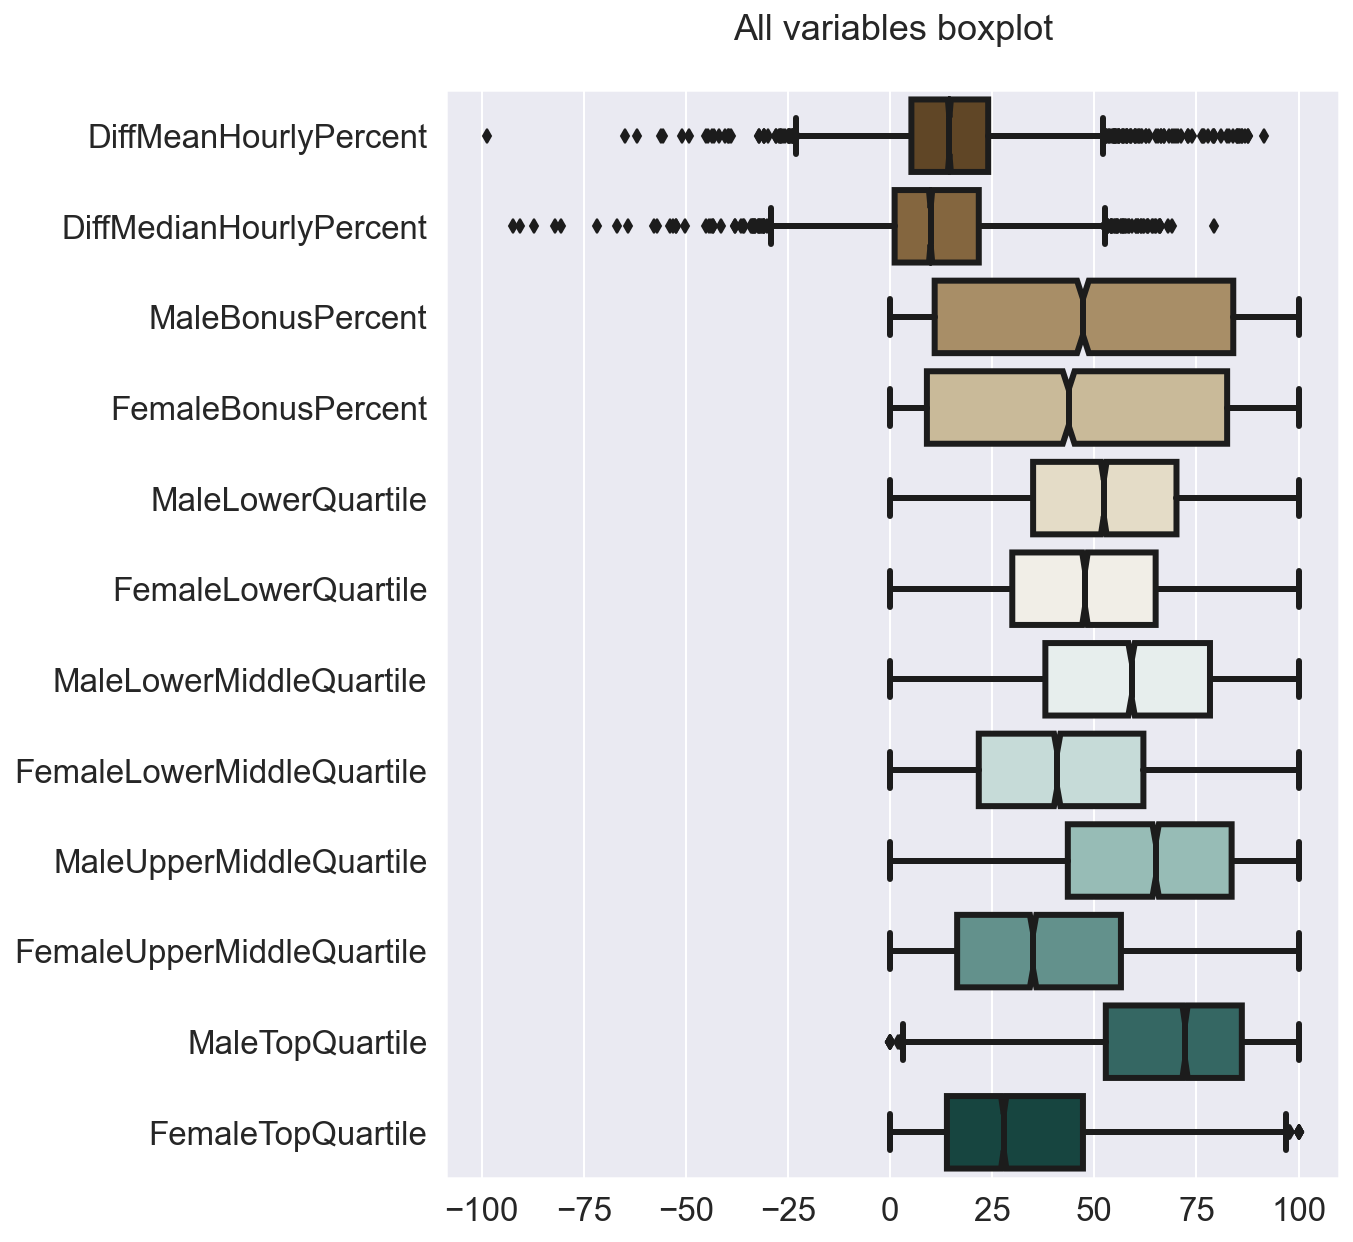

In [25]:
fig, ax = plt.subplots(figsize=(8, 10))

sns.boxplot(data=combined_18_19[GPG_stats], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax, palette='BrBG')

ax.set_title('All variables boxplot\n')
plt.show()

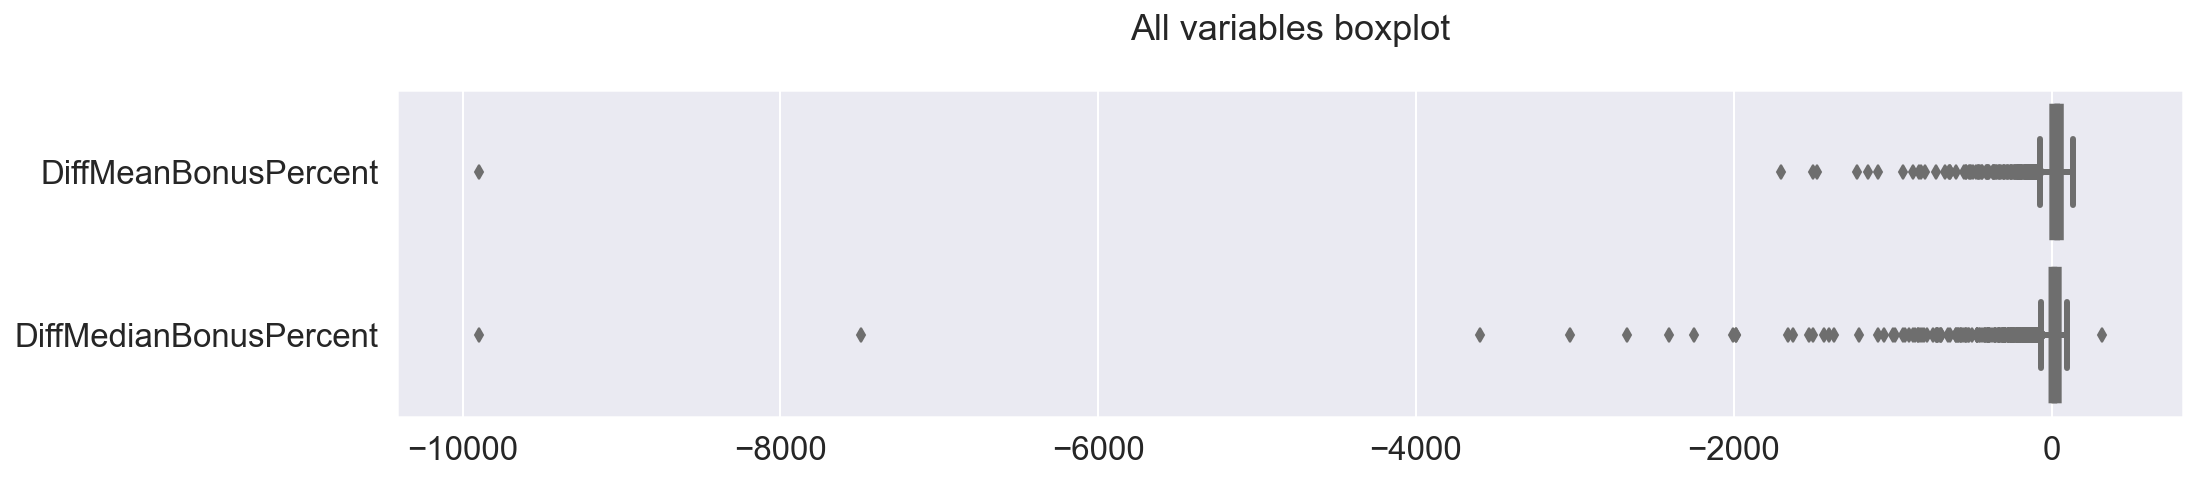

In [28]:
fig, ax = plt.subplots(figsize=(16, 3))

sns.boxplot(data=combined_18_19[continuous_var_3], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax, palette='BrBG')

ax.set_title('All variables boxplot\n')
plt.show()

### Step 2: Review the other continuous variables relating to category review scores

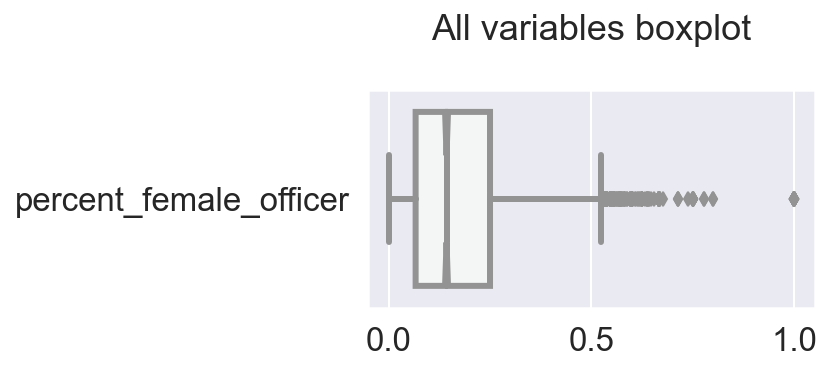

In [26]:
fig, ax = plt.subplots(figsize=(4, 2))

sns.boxplot(data=combined_18_19[continuous_var_1], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax, palette='BrBG')

ax.set_title('All variables boxplot\n')
plt.show()

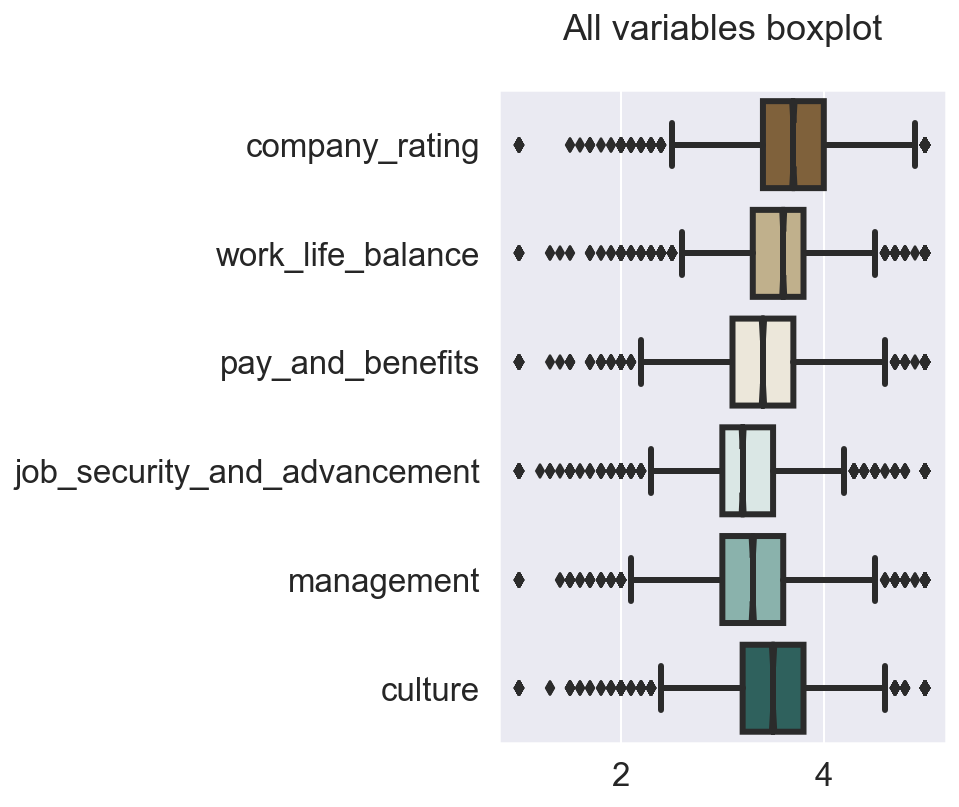

In [27]:
fig, ax = plt.subplots(figsize=(4, 6))

sns.boxplot(data=combined_18_19[continuous_var_2], orient='h', fliersize=5, linewidth=3, notch=True,
            saturation=0.5, ax=ax, palette='BrBG')

ax.set_title('All variables boxplot\n')
plt.show()

### Step 3: Review the correlation heat map to see which factors influence mean pay gap the most. The main standout features were that those with no company link had a greater pay gap difference and those with fewer female officers also had greater pay gap differences. Neither of these are hugely surprising but it is interesting that these correlations are quite prominant at -0.13.

### The company ratings and star ratings all correlate - this is likely because, for category ratings, people are probably likely to be more consistent with their ratings - e.g. rate everything 4-5 or everything 1-2. For the count of star ratings, larger companies would have more of each star rating, smaller would have less.


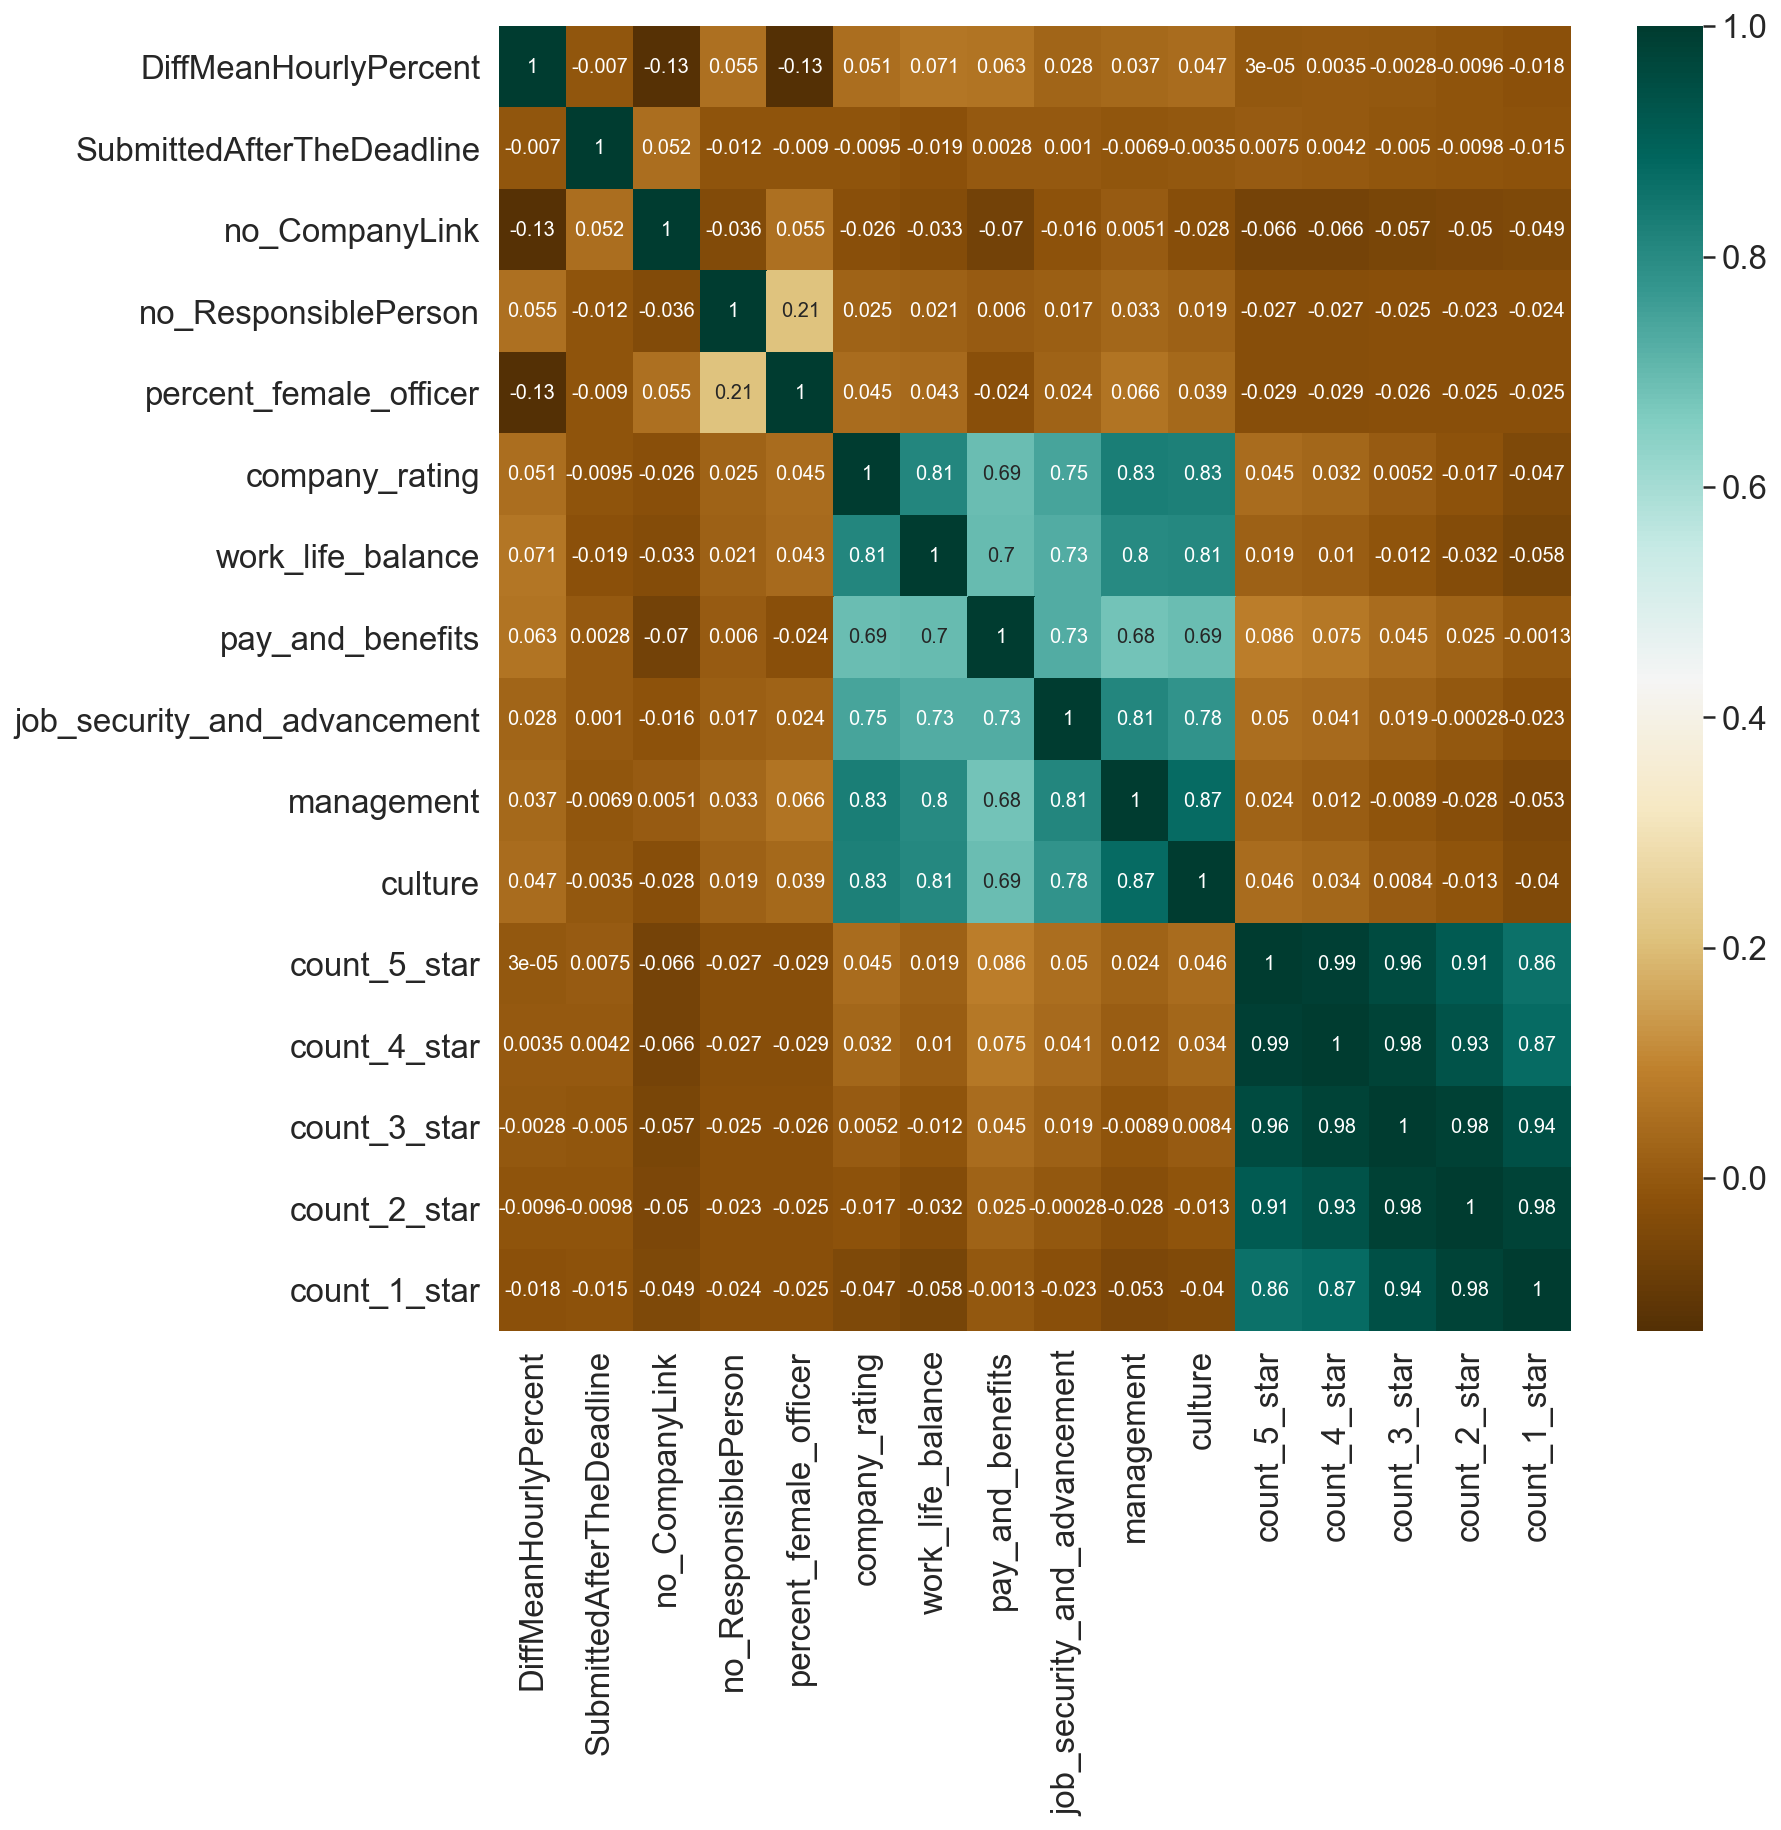

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(combined_18_19[y+binary_var+continuous_var_1+continuous_var_2+continuous_var_4].corr(), annot=True, cmap='BrBG')
plt.show()